In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LM:

    def __init__(self, path, d):
        with open(path) as f:
            dct = json.load(f)
        self.n = dct['n']
        self.eos = dct['eos']
        self.c_abc = dct['c_abc']
        self.c_abx = dct['c_abx']
        self.u_abx = dct['u_abx']
        self.u_xbc = dct['u_xbc']
        self.u_xbx = dct['u_xbx']
        self.r_xbx = dct['r_xbx']
        self.vocab = dct['vocab']
        self.d = d

    def predict_lower(self, ngram):
        if len(ngram) == 0:
            return 1 / len(self.vocab)

        abc, ab = '|'.join(ngram), '|'.join(ngram[:-1])

        if (abc in self.u_xbc) and (ab in self.u_xbx):
            alpha = (self.u_xbc[abc] - self.d) / self.u_xbx[ab]
        else:
            alpha = 0

        if ab in self.u_xbx:
            gamma = self.d * self.r_xbx[ab] / self.u_xbx[ab]
        else:
            gamma = 1

        return alpha + gamma * self.predict_lower(ngram[1:])

    def predict(self, ngram):
        abc, ab = '|'.join(ngram), '|'.join(ngram[:-1])

        if (abc in self.c_abc) and (ab in self.c_abx):
            alpha = (self.c_abc[abc] - self.d) / self.c_abx[ab]
        else:
            alpha = 0

        if ab in self.c_abx:
            gamma = self.d * self.u_abx[ab] / self.c_abx[ab]
        else:
            gamma = 1

        return alpha + gamma * self.predict_lower(ngram[1:])

In [3]:
lm = LM('lm.json', d = 0.75)

with open('valid.txt') as f:
    data = [line.strip().split() for line in f]

In [4]:
lm.d = 0.74
for _ in range(10):
    sent = ['<s>'] * 4
    for i in range(30):
        probs = [lm.predict(sent[-4:] + [token]) for token in lm.vocab]
        token = np.random.choice(lm.vocab, p = probs)
        if token != '<s>':
            sent.append(token)
        else:
            break
    print(' '.join(sent[4:]))

ona li moku .
tan ijo ike li ike .
mi toki pona kin e toki olin sina la sina pini ?
sina pilin e seme ? o pana e pakala .
jan <proper> li pona .
sina olin ala e mi kepeken uta la ona li linja e poki .
tan seme la sina pali e seme lon ni ? - mi jan <proper> .
jan <proper> li pana e telo oko .
mi insa lon seme li lukin e soweli meli sama mi , li toki ante kin .
jan esun li lape li moku .


In [5]:
def sent_to_ngrams(lm, sent):
    sent = ['<s>'] * (lm.n - 1) + sent + ['<s>']
    ngram_iter = zip(*[sent[i:] for i in range(lm.n)])
    return list(ngram_iter)

def calc_ppl(lm, data, d):
    lm.d = d
    probs = [
        -np.log2(lm.predict(ngram))
        for sent in data
        for ngram in sent_to_ngrams(lm, sent)]
    return 2 ** np.mean(probs)

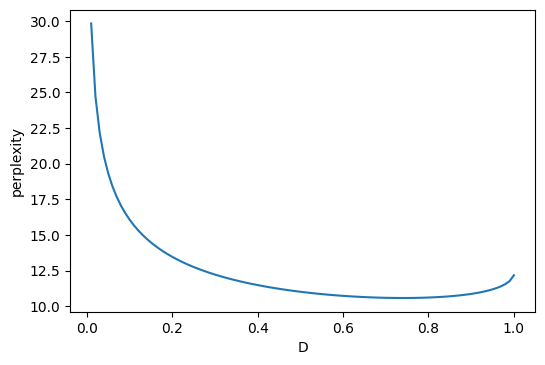

In [6]:
xs = np.linspace(0, 1, 101)[1:]
ys = [calc_ppl(lm, data, d) for d in xs]
plt.figure(dpi = 100)
plt.plot(xs, ys)
plt.xlabel('D')
plt.ylabel('perplexity')
plt.show()

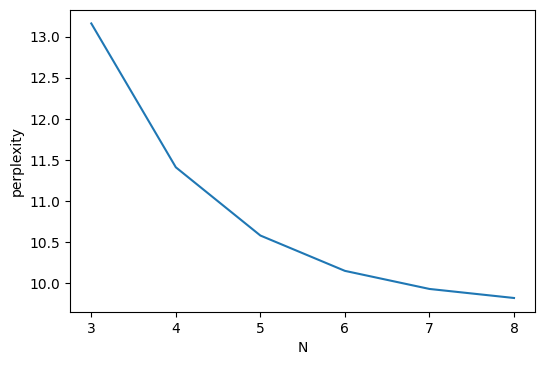

In [7]:
plt.figure(dpi = 100)
plt.plot(range(3, 9),
    [
        13.16,
        11.41,
        10.58,
        10.15,
        9.93,
        9.82,
    ])
plt.xlabel('N')
plt.ylabel('perplexity')
plt.show()

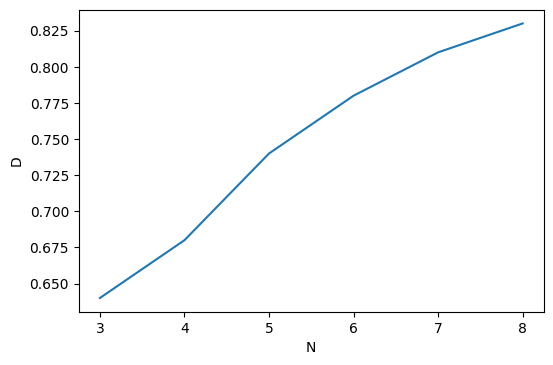

In [8]:
plt.figure(dpi = 100)
plt.plot(range(3, 9),
    [
        0.64,
        0.68,
        0.74,
        0.78,
        0.81,
        0.83
    ])
plt.xlabel('N')
plt.ylabel('D')
plt.show()